In [1]:
from keypoint_moseq.project.io import load_checkpoint, save_llh

INFO:jax._src.lib.xla_bridge:Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO:jax._src.lib.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: Interpreter CUDA Host
INFO:jax._src.lib.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:jax._src.lib.xla_bridge:Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
from keypoint.analysis.bits import process_checkpoints, get_logll_from_checkpoint

In [3]:
project_dir = '/scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/'

In [29]:
llh_df = process_checkpoints(project_dir)

sweep_hyp nlags
each_sweep_dir 1
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv3/2023_07_05-13_25_20_arhmm
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv3/2023_07_05-13_28_56
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv0/2023_07_05-02_38_27
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv0/2023_07_05-04_19_14
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv0/2023_07_05-02_35_09_arhmm
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv1/2023_07_05-08_07_32
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv1/2023_07_05-06_20_12_arhmm
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv1/2023_07_05-06_24_32
loading... /scratch/gpfs/us3519/fit_pair/project/2023_07_05-02_29_02/sweep_nlags/1/cv2/2023_0

In [62]:
run_nlags_0_df = llh_df[llh_df['hyp'] == 'nlags'][llh_df['hyp_idx'] == '0'][llh_df['cv_idx'] < 'cv2'].sort_values(['cv_idx','batch']).groupby(['cv_idx'])
run_nlags_0_df

Boolean Series key will be reindexed to match DataFrame index.

Text(0.5, 1.0, 'log(Y|slds) for CV splits')

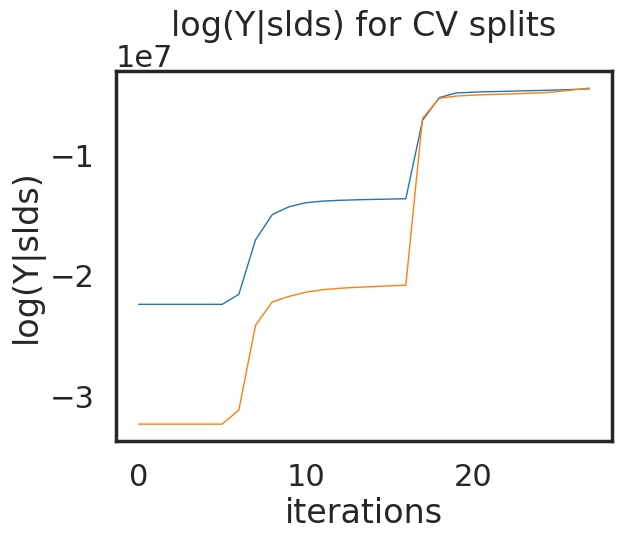

In [75]:
data_ll = run_nlags_0_df.agg({'log_Y_given_model':'sum'})
data_ll = np.array(data_ll['log_Y_given_model'].tolist()).T
# print(data_ll)
plt.plot(data_ll, linewidth=1)
# plt.errorbar(np.arange(len(data_ll)), np.mean(data_ll, axis=1), yerr=np.std(data_ll, axis=1), fmt='-o')
plt.xlabel('iterations')
plt.ylabel('log(Y|slds)')
plt.title('log(Y|slds) for CV splits')

In [76]:
# since it's not normalized by the number of samples, it doesn't make sense

[[38.76578151 38.91694486]
 [38.76578151 38.91694486]
 [38.76578151 38.91694486]
 [38.76578151 38.91694486]
 [38.76578151 38.91694486]
 [38.76578151 38.91694486]
 [40.226756   40.30865698]
 [48.1729068  48.71452031]
 [51.86377664 51.02111081]
 [52.99708295 51.57062915]
 [53.59124411 51.98382965]
 [53.82485918 52.23005123]
 [53.94301766 52.37400318]
 [54.02035057 52.47150567]
 [54.07632703 52.54040448]
 [54.12450824 52.61854144]
 [54.17330292 52.67735375]
 [34.70219139 35.69891519]
 [45.39290645 45.02123936]
 [47.53508918 46.09091433]
 [47.93811034 46.53251781]
 [48.1639423  46.83090893]
 [48.34518471 47.05506673]
 [48.53692525 47.29891817]
 [48.73178818 47.60593202]
 [48.94976609 48.11013399]
 [49.19801959 49.00978313]
 [49.48520946 49.83698258]]


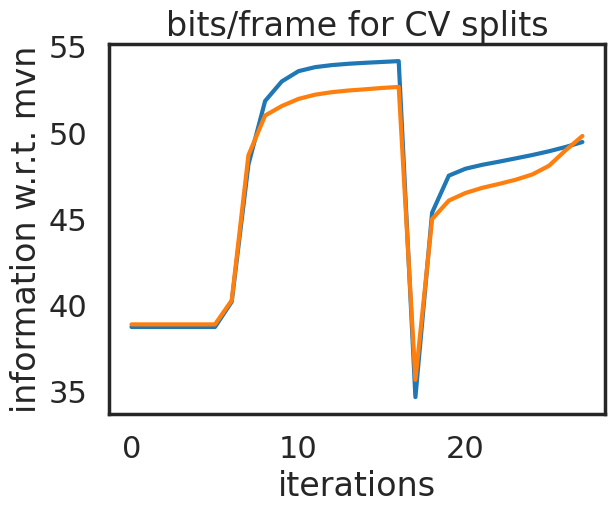

In [67]:
bits_ = np.array(run_nlags_0_df.agg({'bits':'sum'})['bits'].tolist()).T
print(bits_)
plt.plot(bits_)
plt.xlabel('iterations')
plt.ylabel('information w.r.t. mvn')
plt.title('bits/frame for CV splits')

plt.show()